# Régression

## Données jouets

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
a = 6.
b = -1.
c = 1
N = 100
sig = .4

In [3]:
def tirage(N):
	x= np.random.rand(N)
	e=np.random.randn(N)*sig
	y= a*x+b +e
	return x,y

## Validation des formules analytiques

In [4]:
#resolution analytique
x,y=tirage(N)
cv = np.cov(x,y)
acov=cv[0][1]/cv[0][0]
bcov= np.mean(y)-acov* np.mean(x)

### Estimation de paramètres probabilistes

In [5]:
#resolution matricielle
X = np.hstack((x.reshape(N,1),np.ones((N,1))))
A=X.T.dot(X)
B=X.T.dot(y)
wstar=np.linalg.solve(A,B)

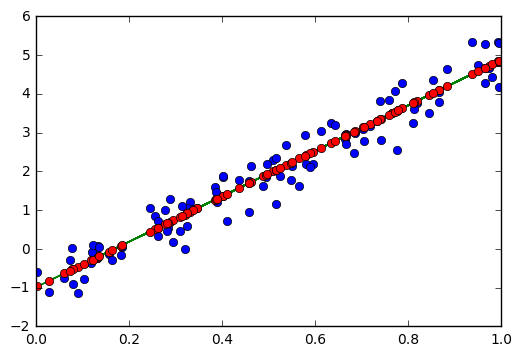

In [6]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,acov*x+bcov)
plt.plot(x,wstar[0]*x+wstar[1],'o')
plt.show()

## Optimisation par descente de gradient

In [9]:
eps = 5e-3
nIterations = 30

def descente_grad(eps,nIterations,X,y):
	wstar = np.linalg.solve(X.T.dot(X), X.T.dot(y)) # pour se rappeler du w optimal
	w = np.zeros(X.shape[1]) # init a 0
	allw = [w]

	for i in range(nIterations):
		w = w -2*eps*X.T.dot((X.dot(w)-y))
		allw.append(w)
	return np.array(allw)

In [10]:
allw=descente_grad(eps,nIterations,X,y)

### tracer de l'espace des couts

In [13]:
def tracer_conv(X,y,wstar,allw):
	# tracer de l'espace des couts
	ngrid = 20
	w1range = np.linspace(-0.5, 8, ngrid)
	w2range = np.linspace(-1.5, 1.5, ngrid)
	w1,w2 = np.meshgrid(w1range,w2range)

	cost = np.array([[np.log(((X.dot(np.array([w1i,w2j]))-y)**2).sum()) for w1i in w1range] for w2j in w2range])

	plt.figure()
	plt.contour(w1, w2, cost)
	plt.scatter(wstar[0], wstar[1],c='r')
	plt.plot(allw[:,0],allw[:,1],'b+-' ,lw=2 )
	plt.show()

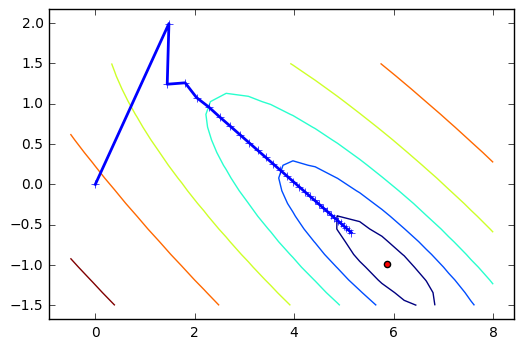

In [14]:
tracer_conv(X,y,wstar,allw)

In [28]:
def tracer_conv_3d(X,y,wstar,allw):
    costPath = np.array([np.log(((X.dot(wtmp)-y)**2).sum()) for wtmp in allw])
    costOpt  = np.log(((X.dot(wstar)-y)**2).sum())
    ngrid = 20
    w1range = np.linspace(-0.5, 8, ngrid)
    w2range = np.linspace(-1.5, 1.5, ngrid)
    w1,w2 = np.meshgrid(w1range,w2range)
    cost = np.array([[np.log(((X.dot(np.array([w1i,w2j]))-y)**2).sum()) for w1i in w1range] for w2j in w2range])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(w1, w2, cost, rstride = 1, cstride=1 )
    ax.scatter(wstar[0], wstar[1],costOpt, c='r')
    ax.plot(allw[:,0],allw[:,1],costPath, 'b+-' ,lw=2 )
    plt.show()

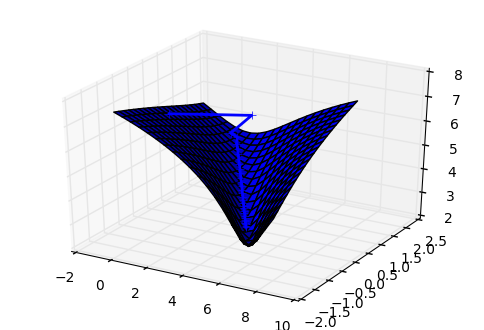

In [29]:
tracer_conv_3d(X,y,wstar,allw)